In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

from keras.preprocessing import image



Loading MNIST dataset to Train and Test Data

In [2]:
(x_train , y_train),(x_test , y_test) = keras.datasets.mnist.load_data()
print("Training Images " , len(x_train))
print("Testing Images  " , len(x_test))

Training Images  60000
Testing Images   10000


In [3]:
x_train[1].shape

(28, 28)

In [4]:
print(x_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

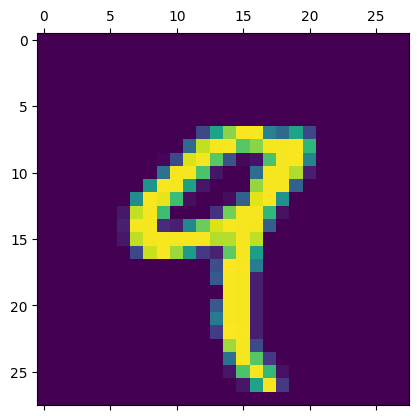

In [5]:
plt.matshow(x_train[4])


In [6]:
#Normalization
x_train=x_train/255
x_test=x_test/255

In [7]:
# Flattening
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)


In [8]:
x_train_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
x_train_flattened[1].shape

(784,)

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

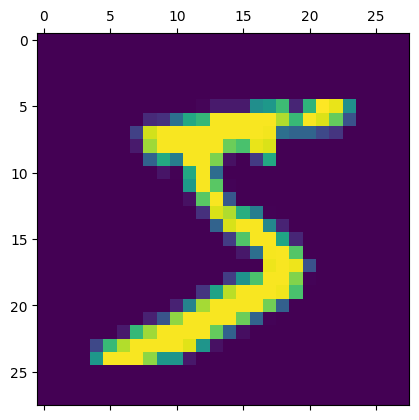

In [11]:
plt.matshow(x_train[0])

In [12]:
model= keras.Sequential([
    keras.layers.Dense(392,input_shape=(784,),activation='relu'),
    keras.layers.Dense(196,activation='sigmoid'),
    keras.layers.Dense(49,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
### Model With Single Layer and No Hidden Layer ###

# model= keras.Sequential([
#      keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
# ])





### Model with 1 Hidden Layer ###

# model= keras.Sequential([
#     keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])





### Model with 2 Hidden Layer ###

# model= keras.Sequential([
#     keras.layers.Dense(500,input_shape=(784,),activation='sigmoid'),
#     keras.layers.Dense(100,activation='sigmoid'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])





### Model with 3 Hidden Layer ###

# model= keras.Sequential([
#     keras.layers.Dense(350,input_shape=(784,),activation='relu'),
#     keras.layers.Dense(160,activation='sigmoid'),
#     keras.layers.Dense(80,activation='sigmoid'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])





### Model with 4 Hidden Layer ###

# model= keras.Sequential([
#     keras.layers.Dense(392,input_shape=(784,),activation='relu'),
#     keras.layers.Dense(196,activation='sigmoid'),
#     keras.layers.Dense(98,activation='sigmoid'),
#     keras.layers.Dense(49,activation='sigmoid'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])


In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 49)             │         9,653 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,901 (1.51 MB)

 Trainable params: 394,901 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit( x_train_flattened, y_train , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8514 - loss: 0.6098
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9708 - loss: 0.1009
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9832 - loss: 0.0590
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9877 - loss: 0.0404
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9899 - loss: 0.0311


Model Evaluation

In [16]:
loss, accuracy = model.evaluate(x_test_flattened , y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9796 - loss: 0.0732
Test Loss: 0.06668123602867126, Test Accuracy: 0.9803000092506409


Saving the Trained Model

In [17]:
output_model = r"./Models/HandWrittenDigitModel.keras"
os.makedirs(os.path.dirname(output_model), exist_ok=True)


# Save the model
try:
    model.save(output_model)
    print(f"Model saved successfully at: {output_model}")
except Exception as e:
    print(f"Error saving model: {e}")


Model saved successfully at: ./Models/HandWrittenDigitModel.keras


Loading the Saved Model

In [18]:
from tensorflow.keras.models import load_model
model = load_model(r"./Models/HandWrittenDigitModel.keras")

Prediction On Our Test Data

In [19]:
y_pridict=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Model Pridiction: [1.4953497e-02 1.9440876e-02 2.0188192e-02 7.8314555e-01 2.1297623e-01
 6.7675956e-02 1.0313589e-04 2.5591564e-01 2.2648327e-01 9.9658281e-01]

Actaual  Value  : 9
Predicted Value : 9


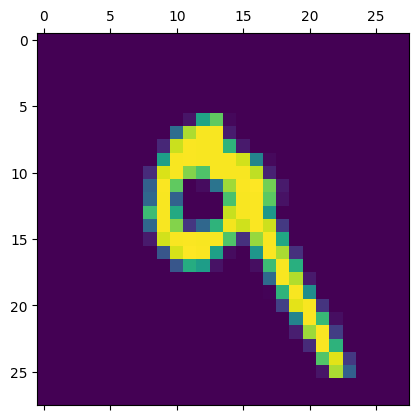

In [20]:
index=7

print("Model Pridiction:",y_pridict[index])
print("\nActaual  Value  :",y_test[index])
print("Predicted Value :",np.argmax(y_pridict[index]))
plt.matshow(x_test[index])

In [21]:
y_pridict_label=[ np.argmax(i) for i in y_pridict ]


In [22]:
from sklearn.metrics import f1_score
f1=f1_score(y_pridict_label, y_test, average='micro')
print("F1 score : ",f1)

F1 score :  0.9803


Confusion Matrix

In [23]:
cm=tf.math.confusion_matrix(labels= y_test ,predictions=y_pridict_label)

Text(95.72222222222221, 0.5, 'Truth')

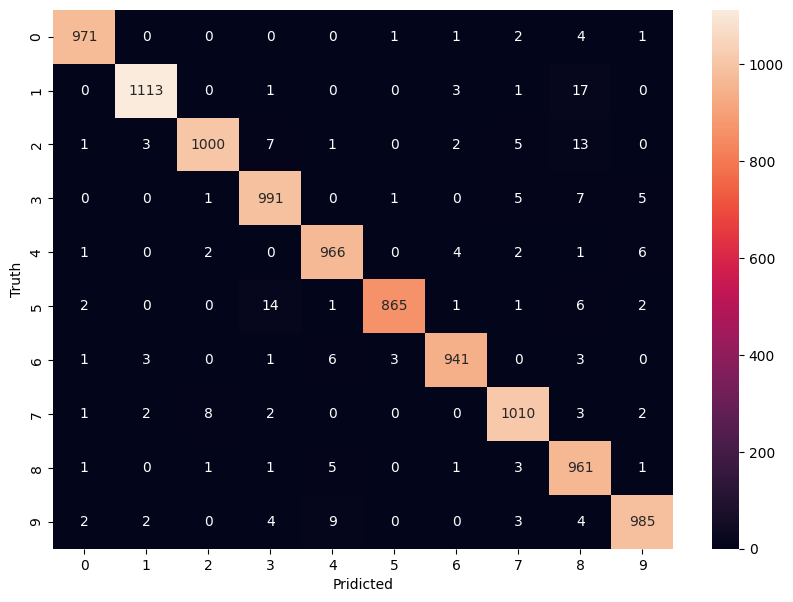

In [24]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Pridicted")
plt.ylabel("Truth")

In [37]:
from sklearn.metrics import f1_score
f1=f1_score(y_pridict_label, y_test, average='micro')
loss, accuracy = model.evaluate(x_test_flattened , y_test)


print(f"\nTest Accuracy: {accuracy},\nTest Loss: {loss}")
print("F1 score : ",f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9796 - loss: 0.0732

Test Accuracy: 0.9803000092506409,
Test Loss: 0.06668123602867126
F1 score :  0.9803
